In [1]:
import matplotlib.pyplot as plt
import pickle 
import numpy as np 
import threebody

In [3]:
## 1000 timestamp = 1 second. 
## This will be adjusted with actual FPS (frame per second)

dt = 0.001 
simulations_per_second = 1000 

## Make sure that dt * sim_per_sec is 1. 
assert (dt * simulations_per_second -1) < 0.01

In [4]:
# An initial condition (that I like)
celbody1 = threebody.body(1,[-1,    0], [0,     -1])
celbody2 = threebody.body(1,[-.5,   1], [1,     1])
celbody3 = threebody.body(1,[2,     0], [0,     0])

system = threebody.three_body_system(celbody1, celbody2, celbody3)

In [5]:
duration = 4*60 # in secounds
for i in range(duration * simulations_per_second):
    system.update(dt=dt, method="LF")

In [6]:
# Due to the implementation, the trajectory should be trimmed.
trajectories = system.trajectory[:,:system.timestamp+1,:]

In [7]:
## translate the trajectory so that the (0,0) is at the center of the plot

trajectories[:,:,0] -= (np.min(trajectories[:,:,0])+np.max(trajectories[:,:,0])) / 2
trajectories[:,:,1] -= (np.min(trajectories[:,:,1])+np.max(trajectories[:,:,1])) / 2

xmin, xmax = np.min(trajectories[:,:,0]), np.max(trajectories[:,:,0])
ymin, ymax = np.min(trajectories[:,:,1]), np.max(trajectories[:,:,1])

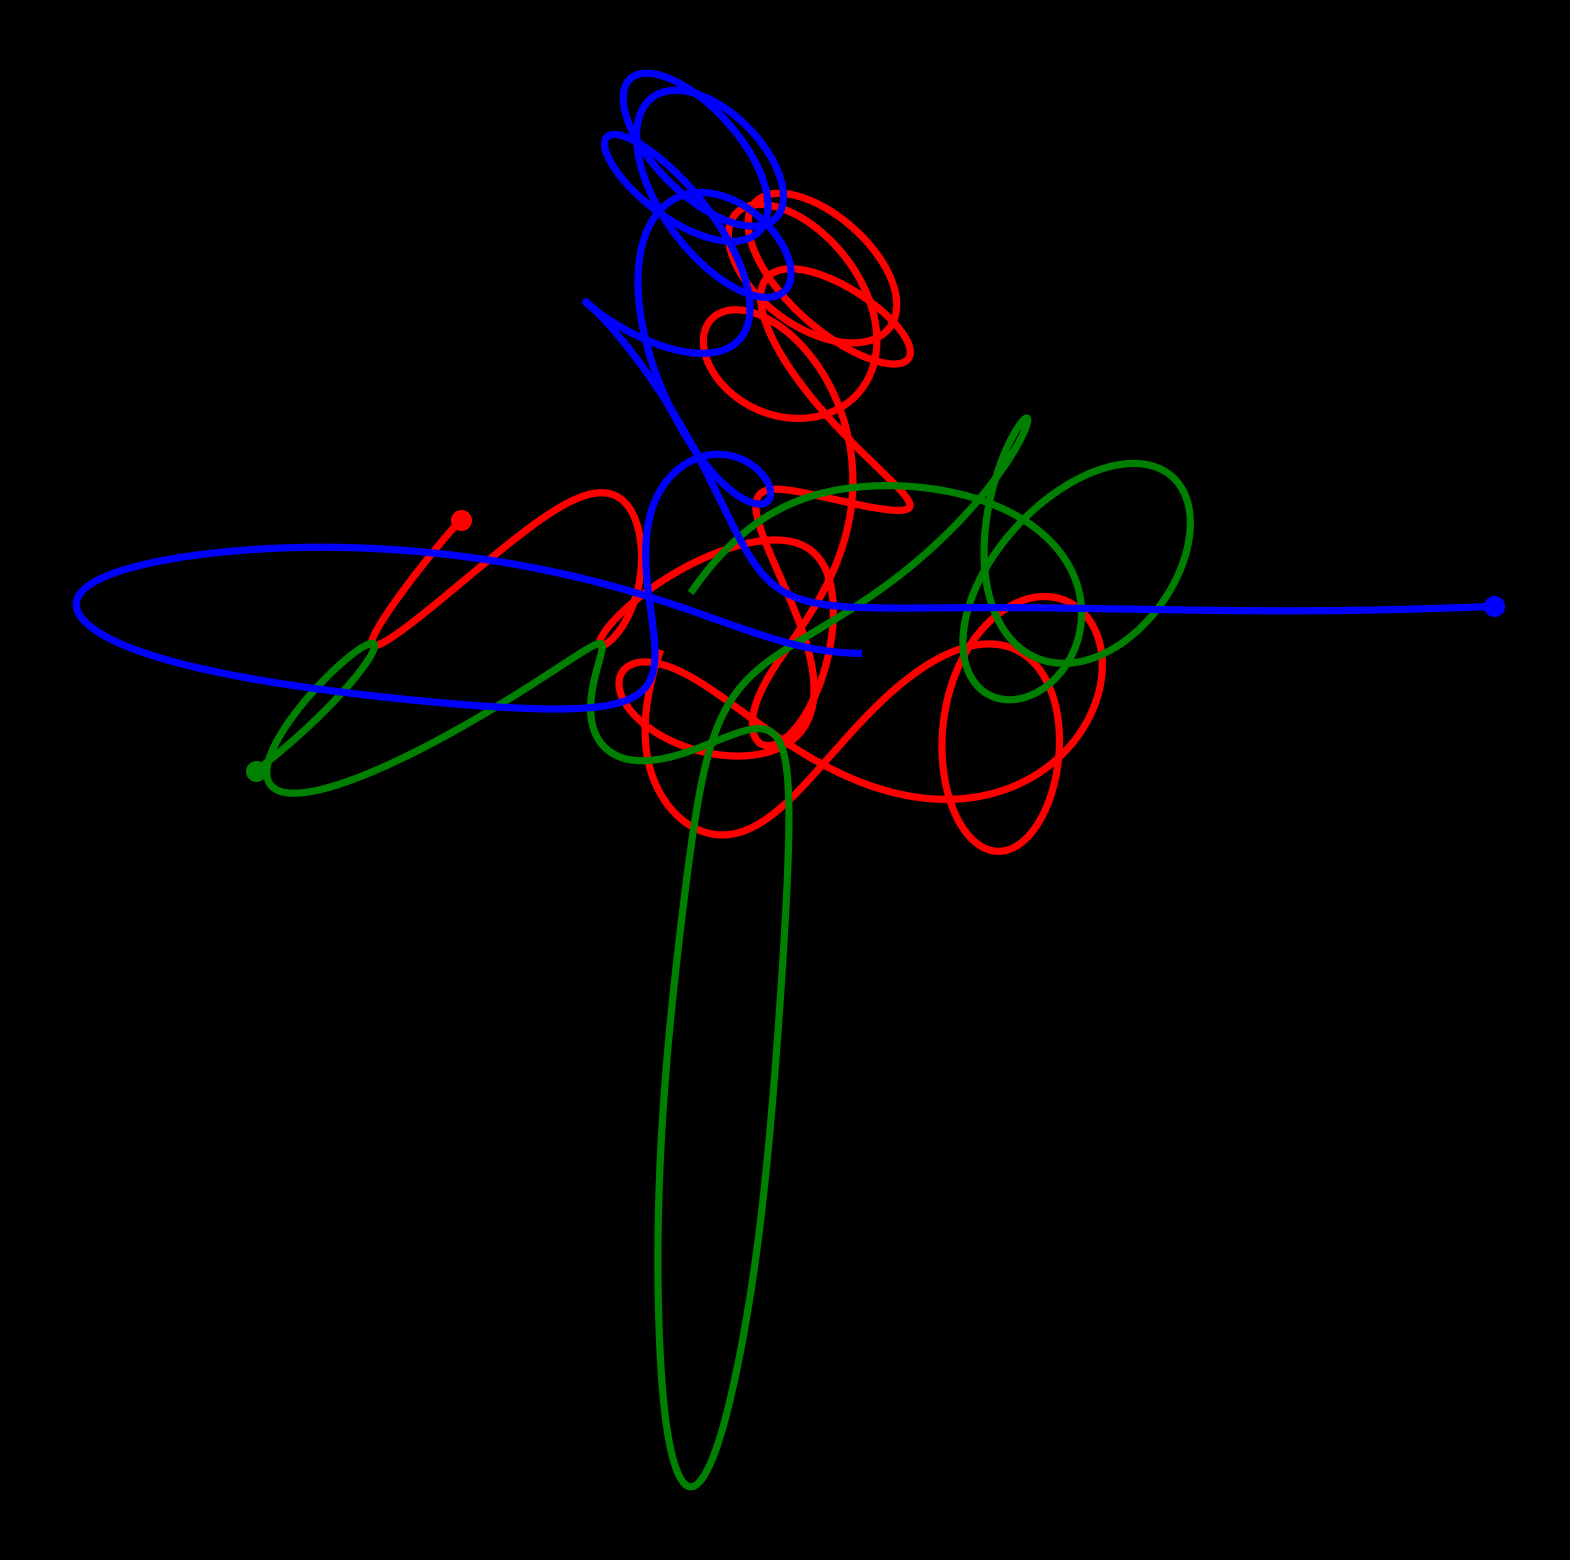

In [8]:
fig, ax = plt.subplots(figsize=(20,20))
fig.patch.set_facecolor('k')
ax.set_axis_off()

margin = 1
ax.set_xlim(xmin-margin, xmax+margin)
ax.set_ylim(ymin-margin, ymax+margin)

lw = 5.2
psize = 800
ax.plot(trajectories[0,:,0], trajectories[0,:,1], linewidth=lw, c='r')
ax.plot(trajectories[1,:,0], trajectories[1,:,1], linewidth=lw, c='g')
ax.plot(trajectories[2,:,0], trajectories[2,:,1], linewidth=lw, c='b')

numlim = -1
ax.scatter(trajectories[0,numlim,0], trajectories[0,numlim,1], s = psize, c='r', marker='.')
ax.scatter(trajectories[1,numlim,0], trajectories[1,numlim,1], s = psize, c='g', marker='.')
ax.scatter(trajectories[2,numlim,0], trajectories[2,numlim,1], s = psize, c='b', marker='.')

# No xticks, yticks. only square boundary 
# ax.set_xticks([])
# ax.set_yticks([])

plt.show()

In [10]:
with open('trajectories.pkl', 'wb') as f:
    pickle.dump([trajectories, (celbody1, celbody2, celbody3)], f)